#what is a deep learning framework ?
A Deep Learning is simply a tool or an interface, that makes us able to build, manage and use Deep Learning models, such as Neural Networks. It can be low-level, which means that the programmer can intervene on the Model structure in detail, or high-level which gives more abstraction in the management.

#Some DL frameworks
TensorFlow, PyTorch, Keras, Sonnet, MXnet...

About PyTorch :
Intially developed for Facebook services but is already used for its own tasks by companies like Twitter. Based on Torch library, PyTorch deals with "Tensors", which are just some kind of arrays, that can tap into the resources of a GPU (Graphic Processing Unit) to significantly speed up matrix operations. To accelerate the process in another way, PyTorch has the Autograd Module, which makes it able to use Automatic Differentiation, that can computes the derivative of the loss function is a very faster way.

#Pytorch vs TensorFlow
In Tensorflow, you first have to define the entire computation graph of the model and then run your ML model. But in PyTorch, you can define & manipulate your graph on-the-go. Also, PyTorch is very *pythonic* : It uses the style and powers of python, which makes it much easier and simpler to understand and use. Especially for Python coders. In Tensorflow, you need to learn a lot of *Tensorflow-specific jargon*.

\
In this tutorial, we're gonna build a standard Neural Network, using PyTorch, to recognize hand written digits in the famous MNIST dataset. We're gonna see how can the choice of the activation function, batch size, epochs number...and other parameters influence the efficiency of our model.
 



In [0]:
import torch
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

#Mnist dataset
MNIST is a large database of handwritten digits that is commonly used for training various image processing systems. It contains 60,000 training images and 10,000 testing images.  In the original paper, the authors use a support-vector machine to get an error rate of 0.8%.


<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine'] 
 num classes :  10
torch.Size([60000])


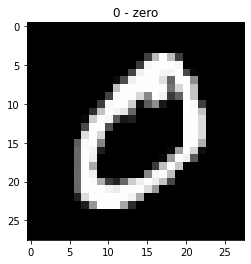

In [81]:
from torchvision import datasets, transforms

# Define a transform to convert the data to pytorch's tensor object
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

images = dataset.data.float()
classes = dataset.classes
labels = dataset.targets

print(type(images))
print(images.shape)
print(classes, "\n num classes : ", len(classes))
print(labels.shape)

img = 1
plt.title(classes[labels[img]])
plt.imshow(images[img].numpy().squeeze(), cmap='Greys_r')

#network definition in Pytorch
Neural networks can be constructed using the torch.nn package. We just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

- if possible, a graphical representation of the implemented neural network

In [0]:
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Weights matrix for hidden layer 1
        self.W_1 = nn.Parameter(torch.Tensor(input_layer_size, output_layer_size))
        self.b_1 = nn.Parameter(torch.Tensor(input_layer_size, output_layer_size))
        #Alternatively 
        # Inputs to hidden layer 1 linear transformation
        #self.hidden = nn.Linear(layer_input_size, layer_output_size)

        # Weights matrix for hidden layer 2
        self.W_2 = nn.Parameter(torch.Tensor(input_layer_size, output_layer_size))
        self.b_2 = nn.Parameter(torch.Tensor(input_layer_size, output_layer_size))
        #Alternatively 
        # Inputs to hidden layer 2 linear transformation
        #self.hidden = nn.Linear(layer_input_size, layer_output_size)

        # Weights matrix for out layer
        self.W_out = nn.Parameter(torch.Tensor(input_layer_size, output_layer_size))
        self.b_out = nn.Parameter(torch.Tensor(input_layer_size, output_layer_size))
        #Alternatively
        # Output layer
        #self.output = nn.Linear(ayer_input_size, layer_output_size)
        self.init_params()
      
    def init_params(self):
      self.W_1.data.normal_(std=0.01)
      self.b_1.data.fill_(0)
      self.W_2.data.normal_(std=0.01)
      self.b_2.data.fill_(0)
      self.W_out.data.normal_(std=0.01)
      self.b_out.data.fill_(0)

    def forward(self, x, log=False):
        if log :
          print("=======forward pass=======")
          print("data on input layer")
          plt.imshow(x.contiguous().detach().view(28,28).numpy(), cmap='Greys_r')
          plt.show()
        # Hidden layer 1 with sigmoid activation
        x = torch.matmul(x, self.W_1)
        x = x + self.b_1
        if log :
          print("data after layer 1 forward function")
          plt.imshow(x.contiguous().detach().view(16,16).numpy(), cmap='Greys_r')
          plt.show()

        x = F.sigmoid(x)
        if log :
          print("data after layer 1 activation function")
          plt.imshow(x.contiguous().detach().view(16,16).numpy(), cmap='Greys_r')
          plt.show()
        #Alternatively
        #x = F.sigmoid(self.hidden(x))

        # Hidden layer 2 with sigmoid activation
        x = torch.matmul(x, self.W_2)
        x = x + self.b_2
        if log :
          print("data after layer 2 forward function")
          plt.imshow(x.contiguous().detach().view(8,8).numpy(), cmap='Greys_r')
          plt.show()
        
        x = F.sigmoid(x)
        if log :
          print("data after layer 2 activation function")
          plt.imshow(x.contiguous().detach().view(8,8).numpy(), cmap='Greys_r')
          plt.show()
        #Alternatively
        #x = F.sigmoid(self.hidden(x))
        
        x = torch.matmul(x, self.W_out)
        x = x + self.b_out
        if log :
          print("data after out layer forward function")
          plt.imshow(x.contiguous().detach().numpy(), cmap='Greys_r')
          plt.show()
        
        x = F.log_softmax(x, dim=1)
        #Alternatively
        # Output layer with softmax activation
        #x = F.log_softmax(self.output(x), dim=1)
        
        return x

model = Network()

#how to feed an image to a neural network ?
An image is actually a series of individual color pixels, where each color pixel is actuall made up of a mix of three colors. So, we can consider an image just as a matrix of numbers. This matrix is transformed into an array and it will feed the Neural Network.

=======forward pass=======
data on input layer


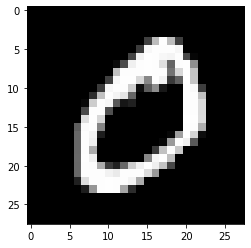

data after layer 1 forward function


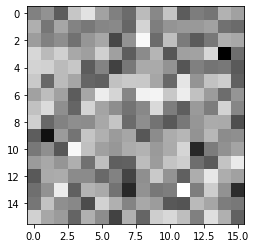

data after layer 1 activation function


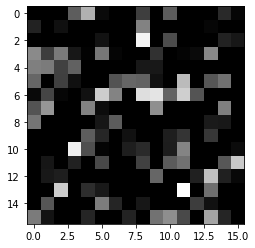

data after layer 2 forward function


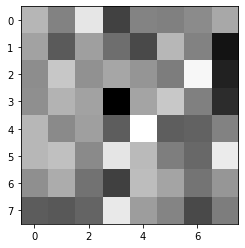

data after layer 2 activation function


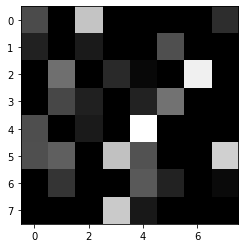

data after out layer forward function


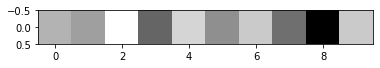

In [83]:
x = images[1]
x.resize_(1, 784)
proba = model.forward(x, log=True)

In [84]:
print(proba)
value, index = proba.max(1)

print("image of classe {} at {:2f}%".format(classes[index],value.data[0]*100))

tensor([[-2.2794, -2.3221, -2.0246, -2.4506, -2.1939, -2.3537, -2.2242, -2.4284,
         -2.6567, -2.2230]], grad_fn=<LogSoftmaxBackward>)
image of classe 2 - two at -202.462769%


**Learning Rate** : configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.\
**Optimizer** : Package implementing various optimization algorithms. It will be used to optimize the gradients by tuning the Model parameters.\
**Nllloss** : The negative log likelihood loss. We use it to train the model for a classification problem with C classes.\
**Epochs** : Hyperparameter that indicates the number of passes through the entire training dataset the machine learning algorithm has completed.


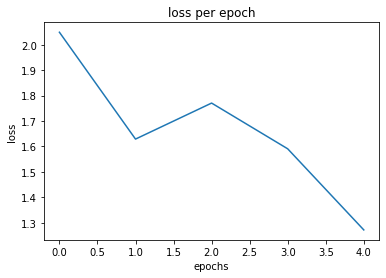

In [85]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# Define the loss
criterion = nn.NLLLoss()

##one step on learning process
# Flatten images
images = images.view(images.shape[0], -1)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()
# Forward pass, get our logits
proba = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(proba, labels)

loss.backward()
optimizer.step()
#########

def train(model, optimizer, criterion, images, labels):
  epochs = 5
  loss_hist = []
  for e in range(epochs):
      optimizer.zero_grad()
      
      output = model(images)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
          
      loss_hist.append(loss.item())

  plt.plot(loss_hist)
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.title("loss per epoch")
  plt.show()
train(model, optimizer, criterion, images, labels)

In [0]:
# Evaluate the Model
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine'] , size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

def evaluate(model, images):
  # Get images from test set
  test_images = images
  # Prepare the input data
  img = test_images.view(n_images, -1)
  # Use the model to predict the images class
  with torch.no_grad():
      proba = model(img)
  proba = torch.exp(proba)
  # Display
  for i in range(n_images):
      view_classify(img[i].view(1, 28, 28), proba[i])

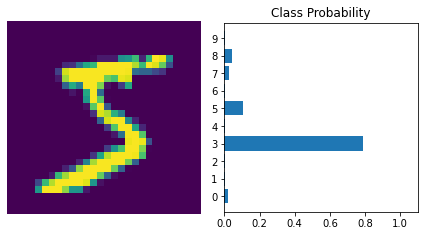

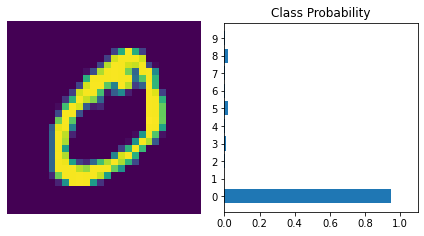

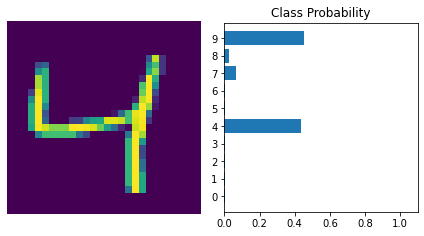

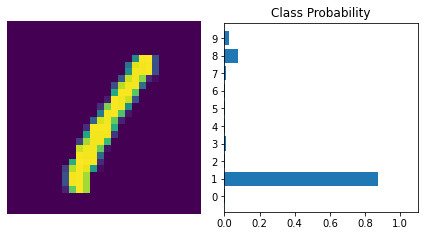

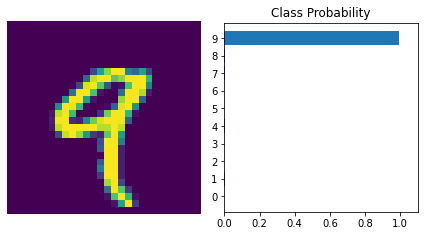

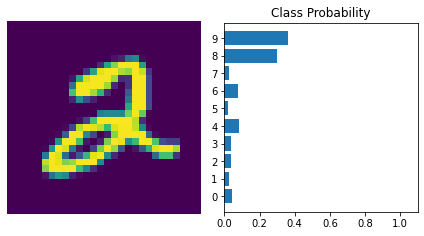

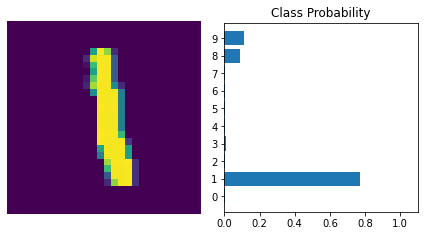

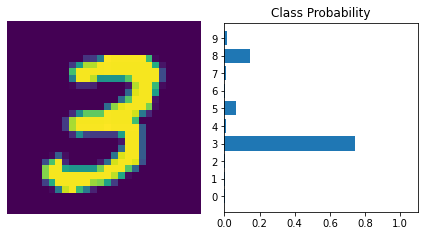

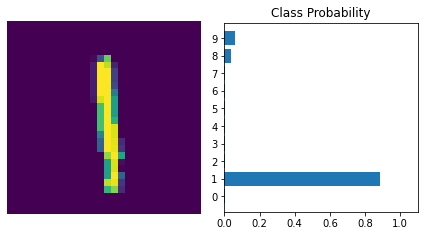

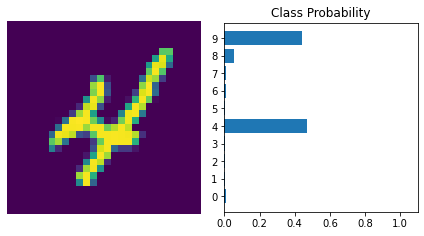

In [87]:
# Predict single images
n_images = 10
evaluate(model, images[:n_images])

#Using Batches

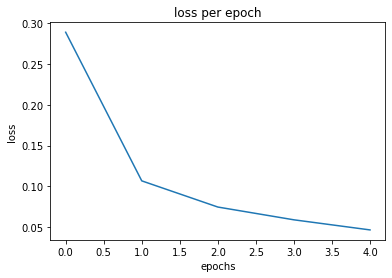

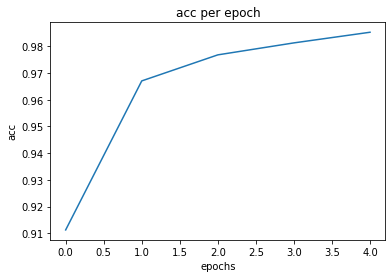

In [88]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 64
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# Define the loss
criterion = nn.NLLLoss()

def train(model, optimizer, criterion, trainloader):
  epochs = 5
  loss_hist = []
  acc_hist = []
  for e in range(epochs):
    running_loss = 0
    accuracy = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
        top_p, top_class = torch.exp(output).topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        
    acc_hist.append(accuracy/len(trainloader))
    loss_hist.append(running_loss/len(trainloader))

  plt.plot(loss_hist)
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.title("loss per epoch")
  plt.show()
  plt.plot(acc_hist)
  plt.ylabel("acc")
  plt.xlabel("epochs")
  plt.title("acc per epoch")
  plt.show()
train(model, optimizer, criterion, trainloader)

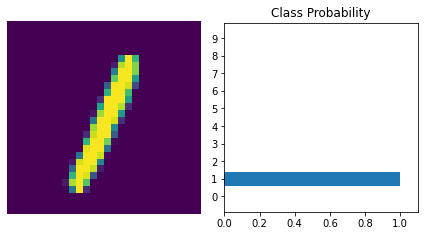

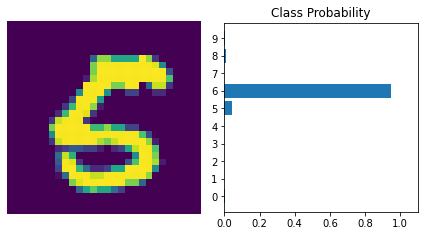

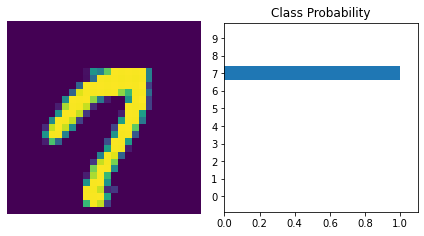

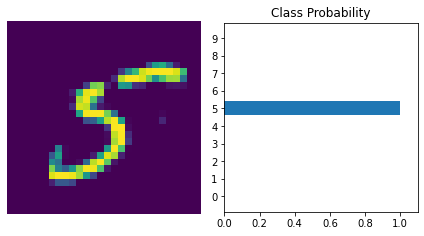

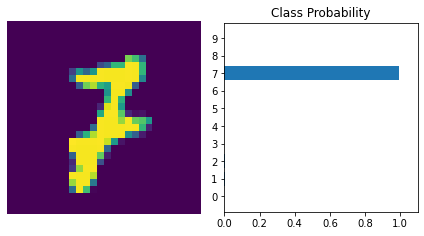

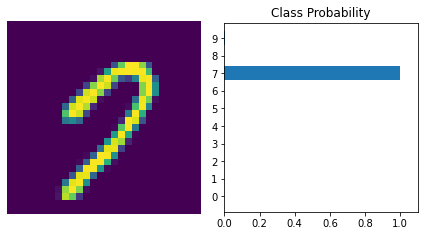

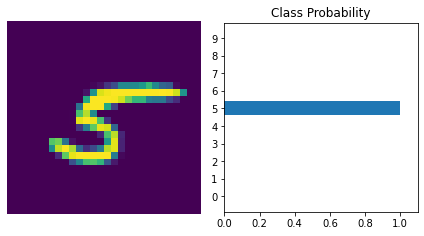

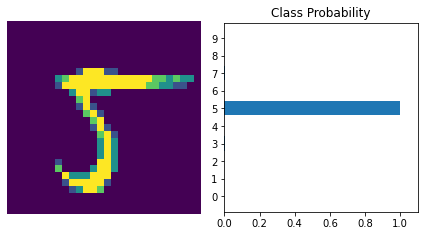

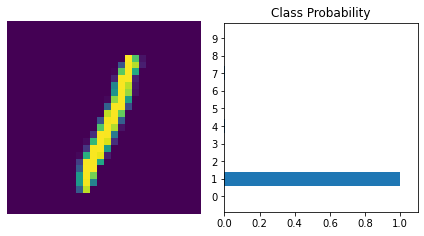

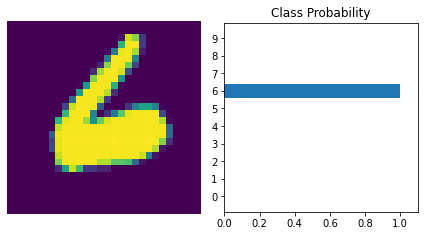

In [89]:
# Predict single images
n_images = 10
images, labels = next(iter(trainloader))
evaluate(model, images[:n_images])

#What if we normalize the data ?

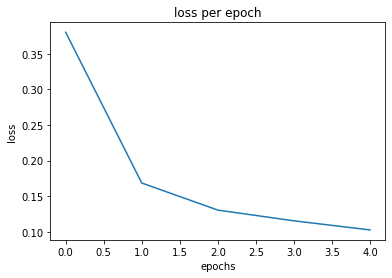

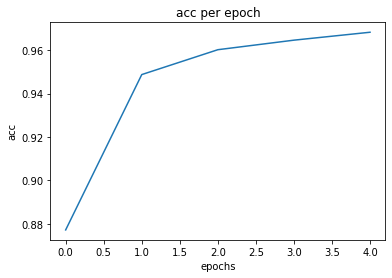

In [90]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# Define the loss
criterion = nn.NLLLoss()

train(model, optimizer, criterion, trainloader)

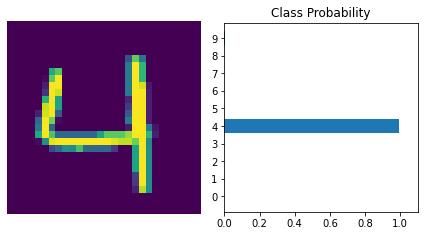

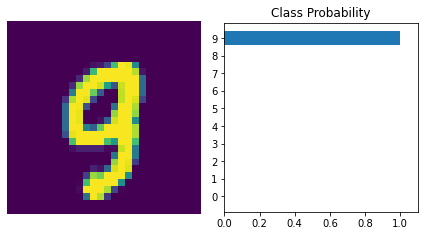

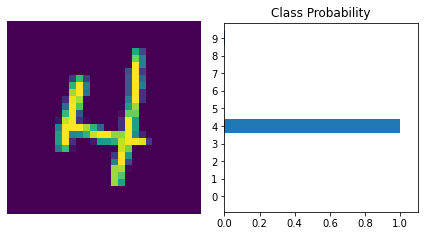

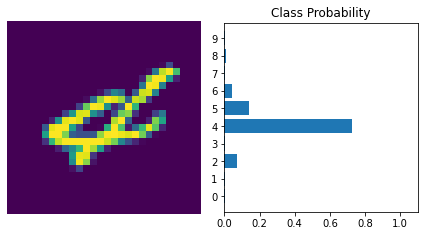

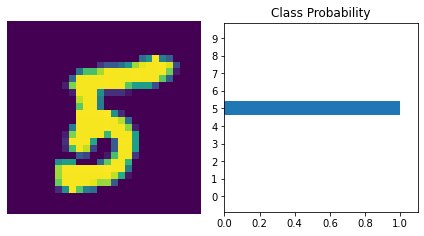

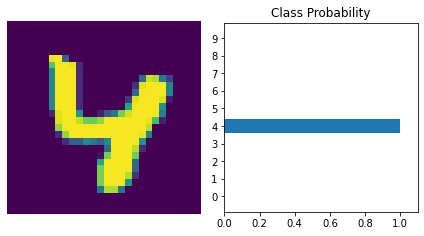

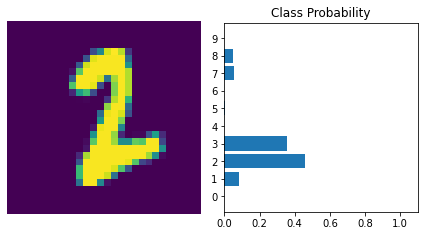

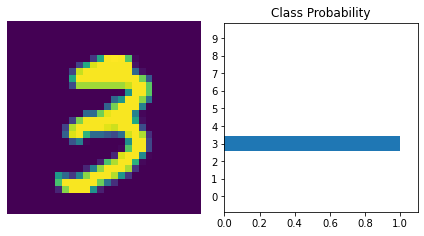

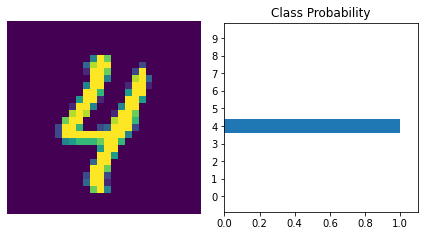

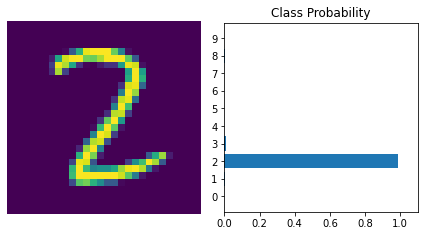

In [91]:
# Predict single images
n_images = 10
images, labels = next(iter(trainloader))
evaluate(model, images[:n_images])

**Split** : Process of splitting the whole data into train and test set. The train set will be feeded to the Model for the training, and the latter will be tested with the testing set.\
**Validation** : Process where the trained model is evaluated with a testing data set. This step comes after the training is completed.\
**Accuracy** : The measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input data.
